# Importar Liberías

In [9]:
import pandas as pd
import numpy as np
import sklearn 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import backend as K

# Importar dataset

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/PreprocessedDataset_v1.csv', sep=',')

In [11]:
df

,Year,Female,Male,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Road Traffic Deaths,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing Urban,Basic Hand Washing Rural,Clean Fuel and Technology,Birth Rate,% Injury Deaths,Death Rate,GDP per Capita,% Population $1.90 a day,% Population $3.20 a day,% Population $5.50 a day,Income per Capita,Total Population,GNI per Capita,Intervention Against NTDs per capita,Battle Related Deaths %,Conflict and Terrorism Deaths %
0,-1.676227,1,1,-1.765051,1.813957,1.835785,1.772102,1.685511,1.716276,1.636459,1.666281,1.191707,1.802915,-0.387528,-1.654273,0.618339,0.168847,1.594019,-1.678222,-1.338421,-1.303630,-1.313875,-1.325348,-1.360620,1.638180,1.666014,1.593534,-1.797504,2.232264,2.268980,2.100067,0.968968,0.864792,0.806688,0.900733,-0.101751,1.092990,-1.615070,0.629910,0.124692,0.781676,0.149644,-0.141128,0.201453,-0.845857,-0.833420,-1.061488,-0.948986,-1.565985,-1.311086,-1.429013,-1.088377,-0.299934,-0.114894,0.200304,-1.092936,-0.624522,-1.024017,-1.128046,1.685441,0.750699,1.510412,-1.204893,1.176272,1.060973,0.942444,-0.676260,0.238810,-1.173225,0.906566,0.182770,3.522187
1,-1.676227,1,0,-1.654910,1.753811,1.773792,1.716222,1.662263,1.692057,1.615029,1.666281,1.191707,1.802915,-0.387528,-1.654273,0.618339,0.168274,1.568862,-1.662811,-1.269569,-1.172189,-1.253135,-1.350684,-1.500930,1.638180,1.666014,1.593534,-1.797504,2.232264,2.268980,2.100067,0.968968,0.864792,0.806688,0.900733,-0.101751,1.092990,-1.615070,0.629910,0.124692,0.781676,0.149644,-0.141128,0.201453,-0.845857,-0.833420,-1.061488,-0.948986,-1.565985,-1.311086,-1.429013,-1.088377,-0.299934,-0.114894,0.200304,-1.092936,-0.624522,-1.024017,-1.128046,1.685441,0.750699,1.510412,-1.204893,1.176333,1.061032,0.942494,-0.676260,0.238810,-1.173225,0.906566,0.182770,3.522187
2,-1.676227,0,1,-1.869146,1.867696,1.886133,1.829031,1.706700,1.737746,1.659191,1.666281,1.191707,1.802915,-0.387528,-1.654273,0.618339,0.169369,1.618076,-1.692957,-1.405271,-1.333084,-1.447097,-1.485827,-1.572239,1.638180,1.666014,1.593534,-1.797504,2.232264,2.268980,2.100067,0.968968,0.864792,0.806688,0.900733,-0.101751,1.092990,-1.615070,0.629910,0.124692,0.781676,0.149644,-0.141128,0.201453,-0.845857,-0.833420,-1.061488,-0.948986,-1.565985,-1.311086,-1.429013,-1.088377,-0.299934,-0.114894,0.200304,-1.092936,-0.624522,-1.024017,-1.128046,1.685441,0.750699,1.510412,-1.204893,1.176208,1.060909,0.942391,-0.676260,0.238810,-1.173225,0.906566,0.182770,3.522187
3,-1.560489,1,1,-1.698828,1.779391,1.805711,1.729967,1.655063,1.689869,1.601731,1.666281,1.191707,1.802915,-0.387528,-1.654273,0.618339,0.168328,1.585657,-1.667403,-1.334121,-1

# Separación de la variable objetivo

In [12]:
X = df.drop(columns=['Life Expectancy'])
y = df['Life Expectancy']

# División en conjunto de entrenamiento y de test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Modelos

In [14]:
#Función para deshacer la estandarización  en la variable objetivo
df_filled = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/FilledDataset_v1.csv',sep=',')
scaler = StandardScaler()
scaler.fit(df_filled['Life Expectancy'].values.reshape(-1,1))

StandardScaler()

In [15]:
def errorMetrics(X_train,y_train,X_test,y_test, y_train_predicted,y_test_predicted):
    #Error de entrenamiento y de test según diferentes métricas de medida:
    #Hay que tener en cuenta en los errores de absolute value que se ha quitado algunas fila por ser NaN
    y_test_unstandarized = scaler.inverse_transform(y_test.values.reshape(-1,1))
    y_test_predicted_unstandarized = scaler.inverse_transform(y_test_predicted)

    print("\nRMSE Train standarized values: ", str(mean_squared_error(y_train, y_train_predicted, squared = False)))
    print("RMSE Test standarized values: ", str(mean_squared_error(y_test, y_test_predicted, squared = False)))
    print("RMSE Test absolute values: ", str(mean_squared_error(y_test_unstandarized, y_test_predicted_unstandarized, squared = False)))

    print("\nMAE Train standarized values: ", str(mean_absolute_error(y_train, y_train_predicted)))
    print("MAE Test standarized values: ", str(mean_absolute_error(y_test, y_test_predicted)))
    print("MAE Test absolute values: ", str(mean_absolute_error(y_test_unstandarized, y_test_predicted_unstandarized)))

    print("\nR2 Train: ", str(r2_score(y_train, y_train_predicted)))
    print("R2 Test: ", str(r2_score(y_test, y_test_predicted)))

## Regresión Lineal

In [ ]:
#Entrenamiento
linear = LinearRegression()
linear.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Regresión Lineal:")
errorMetrics(X_train,y_train,X_test,y_test, linear.predict(X_train), linear.predict(X_test))

Regresión Lineal:

RMSE Train standarized values:  0.19536086501110822
RMSE Test standarized values:  0.20243323733252294
RMSE Test absolute values:  2.0419441511195684

MAE Train standarized values:  0.13485686878739134
MAE Test standarized values:  0.13586286433647898
MAE Test absolute values:  1.37044877037914

R2 Train:  0.9621775995369435
R2 Test:  0.9574677872014932


## Elastic-Net

In [ ]:
#GridSearch de la regresión Elastic-Net para optimizar R2

grid_EN = GridSearchCV(
    ElasticNet(),
    {'alpha': (0,0.00001,0.0001,0.001,0.1,1,10,100,1000),
    'l1_ratio': (0,0.001, 0.01, 0.1, 0.5,0.9,0.99,0.999,1)},
    scoring='r2',                                 
    cv=5,
    n_jobs=-1,
    verbose = 0,
    return_train_score = True
)

grid_EN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': (0, 1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000),
                         'l1_ratio': (0, 0.001, 0.01, 0.1, 0.5, 0.9, 0.99,
                                      0.999, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
resultados = pd.DataFrame(grid_EN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) 

,param_alpha,param_l1_ratio,mean_test_score,std_test_score,mean_train_score,std_train_score
12,1e-05,0.1,0.961294,0.001210,0.961952,0.000293
0,0,0,0.961294,0.001211,0.961952,0.000293
2,0,0.01,0.961294,0.001211,0.961952,0.000293
3,0,0.1,0.961294,0.001211,0.961952,0.000293
4,0,0.5,0.961294,0.001211,0.961952,0.000293
...,...,...,...,...,...,...
53,1,1,-0.001018,0.000966,0.000000,0.000000
52,1,0.999,-0.001018,0.000966,0.000000,0.000000
51,1,0.99,-0.001018,0.000966,0.000000,0.000000
50,1,0.9,-0.001018,0.000966,0.000000,0.000000


In [ ]:
errorMetrics(X_train,y_train,X_test,y_test, grid_EN.predict(X_train), grid_EN.predict(X_test))


RMSE Train standarized values:  0.1961075038770124
RMSE Test standarized values:  0.2030863851434431
RMSE Test absolute values:  2.04853245336627

MAE Train standarized values:  0.13507549596845847
MAE Test standarized values:  0.13610263932226188
MAE Test absolute values:  1.3728673807627694

R2 Train:  0.9618879444106829
R2 Test:  0.9571928853361765


## KNN

In [ ]:
#GridSearch de la regresión KNN para optimizar RMSE
grid_KNN = GridSearchCV(
    KNeighborsRegressor(),
    {'n_neighbors': (2,3,4,5,10),
     'weights': ('uniform', 'distance')},
     scoring='r2',                              
     cv=5,
     n_jobs=-1,
     return_train_score = True
)
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': (2, 3, 4, 5, 10),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
resultados = pd.DataFrame(grid_KNN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_n_neighbors,param_weights,mean_test_score,std_test_score,mean_train_score,std_train_score
3,3,distance,0.990970,0.000912,1.000000,0.000000
1,2,distance,0.990711,0.000877,1.000000,0.000000
5,4,distance,0.990472,0.000921,1.000000,0.000000
7,5,distance,0.989653,0.000971,1.000000,0.000000
0,2,uniform,0.989376,0.001052,0.997116,0.000070
2,3,uniform,0.989031,0.001125,0.995422,0.000106
4,4,uniform,0.987745,0.001126,0.993821,0.000127
6,5,uniform,0.986186,0.001284,0.992173,0.000193
9,10,distance,0.984983,0.001115,1.000000,0.000000
8,10,uniform,0.977604,0.001812,0.983219,0.000147


In [ ]:
errorMetrics(X_train,y_train,X_test,y_test, grid_KNN.predict(X_train), grid_KNN.predict(X_test))


RMSE Train standarized values:  0.0
RMSE Test standarized values:  0.08895883956953218
RMSE Test absolute values:  0.8973278525947206

MAE Train standarized values:  0.0
MAE Test standarized values:  0.052948085600309135
MAE Test absolute values:  0.5340873619826233

R2 Train:  1.0
R2 Test:  0.9917864187923016


## Random Forrest Regressor

In [16]:
rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=100, random_state=210, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, n_jobs=-1, random_state=210)

In [17]:
errorMetrics(X_train,y_train,X_test,y_test, rf.predict(X_train), rf.predict(X_test))


RMSE Train standarized values:  0.025380115566002698
RMSE Test standarized values:  0.07728391726208525
RMSE Test absolute values:  0.7795629063111856

MAE Train standarized values:  0.015457875636486424
MAE Test standarized values:  0.043346693940975504
MAE Test absolute values:  0.4372381202290079

R2 Train:  0.9993616466526078
R2 Test:  0.9938008436346476


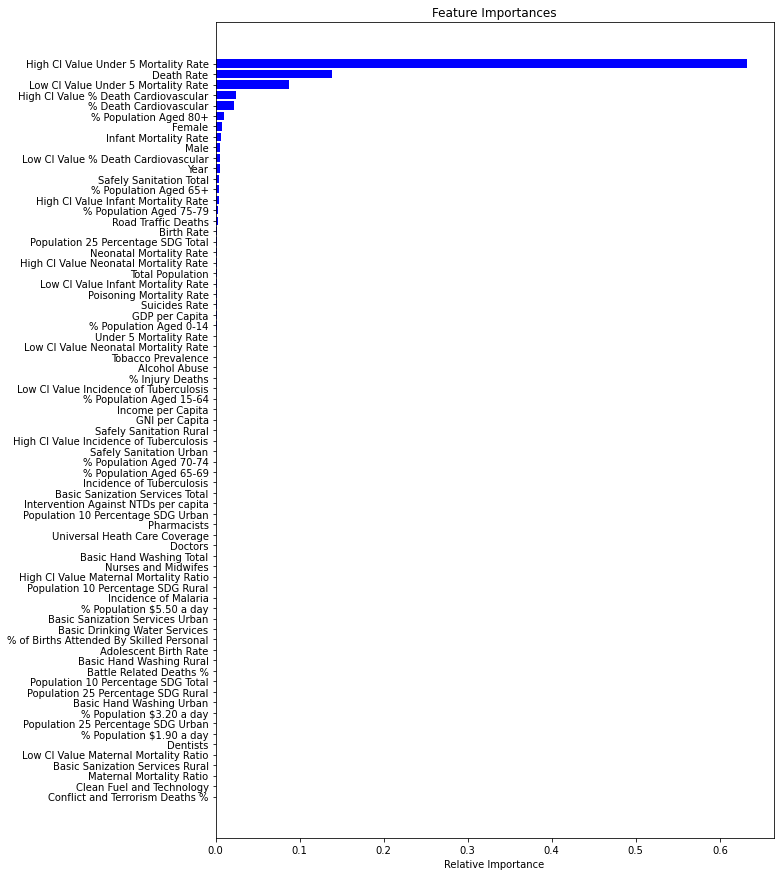

In [18]:
# plotting feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
indicesOrdered = indices[::-1]
pd.DataFrame({'Feature': [features[i] for i in indicesOrdered], 'Importancia': importances[indicesOrdered]}).head(20)

,Feature,Importancia
0,High CI Value Under 5 Mortality Rate,0.632327
1,Death Rate,0.138211
2,Low CI Value Under 5 Mortality Rate,0.087504
3,High CI Value % Death Cardiovascular,0.023845
4,% Death Cardiovascular,0.022506
5,% Population Aged 80+,0.010222
6,Female,0.007774
7,Infant Mortality Rate,0.006056
8,Male,0.005751
9,Low CI Value % Death Cardiovascular,0.005324


## Red de Neuronas

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
X_train.shape

(12576, 71)

In [ ]:
X_train_tf = tf.cast(np.array(X_train), dtype=tf.float32)
y_train_tf = tf.cast(np.array(y_train), dtype=tf.float32)

In [ ]:
#Cortesía de https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
def r2_score_metric(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
model = keras.Sequential([
                          layers.Dense(300, activation=tf.nn.relu, input_shape=(len(X_train.keys()),)),
                          layers.Dense(300, activation=tf.nn.relu),
                          layers.Dense(1)])
                         
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', r2_score_metric])

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 300)               21600     
_________________________________________________________________
dense_91 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 301       
Total params: 112,201
Trainable params: 112,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintEpochMetrics(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch%100 == 0):
            print(logs)

In [ ]:
#Early stop: Para cuando el valor de validación empieza a empeorar respectp al de entrenamiento
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

hist = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.2, callbacks=[early_stop, PrintEpochMetrics()])

{'loss': 0.07983076572418213, 'mae': 0.19018340110778809, 'mse': 0.07983076572418213, 'r2_score_metric': 0.9125723838806152, 'val_loss': 0.029941722750663757, 'val_mae': 0.13964831829071045, 'val_mse': 0.029941722750663757, 'val_r2_score_metric': 0.9682002067565918}
{'loss': 0.0013932804577052593, 'mae': 0.026795892044901848, 'mse': 0.0013932804577052593, 'r2_score_metric': 0.9985061883926392, 'val_loss': 0.001750631257891655, 'val_mae': 0.0272221677005291, 'val_mse': 0.001750631257891655, 'val_r2_score_metric': 0.9981577396392822}
{'loss': 0.0009788875468075275, 'mae': 0.022389043122529984, 'mse': 0.0009788875468075275, 'r2_score_metric': 0.9989684820175171, 'val_loss': 0.0014875910710543394, 'val_mae': 0.025399086996912956, 'val_mse': 0.0014875910710543394, 'val_r2_score_metric': 0.9984444975852966}


In [ ]:
pd.DataFrame(hist.history)

,loss,mae,mse,r2_score_metric,val_loss,val_mae,val_mse,val_r2_score_metric
0,0.079831,0.190183,0.079831,0.912572,0.029942,0.139648,0.029942,0.968200
1,0.024278,0.113169,0.024278,0.973730,0.016228,0.093768,0.016228,0.983194
2,0.016660,0.092147,0.016660,0.982346,0.007101,0.061306,0.007101,0.992636
3,0.012688,0.081436,0.012688,0.986562,0.018770,0.093255,0.018770,0.981108
4,0.010906,0.074905,0.010906,0.988535,0.011145,0.080838,0.011145,0.988601
...,...,...,...,...,...,...,...,...
206,0.001008,0.022651,0.001008,0.998934,0.001492,0.027059,0.001492,0.998431
207,0.000961,0.022025,0.000961,0.998979,0.002391,0.033160,0.002391,0.997590
208,0.000980,0.022352,0.000980,0.998971,0.001279,0.024053,0.001279,0.998650
209,0.000964,0.022176,0.000964,0.998978,0.001574,0.028351,0.001574,0.998354


In [ ]:
def plotHistory(history):
    history = pd.DataFrame(hist.history)
    history['epoch'] = hist.epoch 

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error(RMSE)')
    plt.plot(history['epoch'], (history['mse'] ** 1/2), label='Train Error')
    plt.plot(history['epoch'], (history['val_mse'] ** 1/2), label='Validation Error')
    plt.legend()

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error(MAE)')
    plt.plot(history['epoch'], history['mae'], label='Train Error')
    plt.plot(history['epoch'], history['val_mae'], label='Validation Error')
    plt.legend()

    plt.figure(figsize=(12,6))
    plt.xlabel('Epoch')
    plt.ylabel('Coefficient of Determination R2')
    plt.plot(history['epoch'], history['r2_score_metric'], label='Train Error')
    plt.plot(history['epoch'], history['val_r2_score_metric'], label='Validation Error')
    plt.legend()

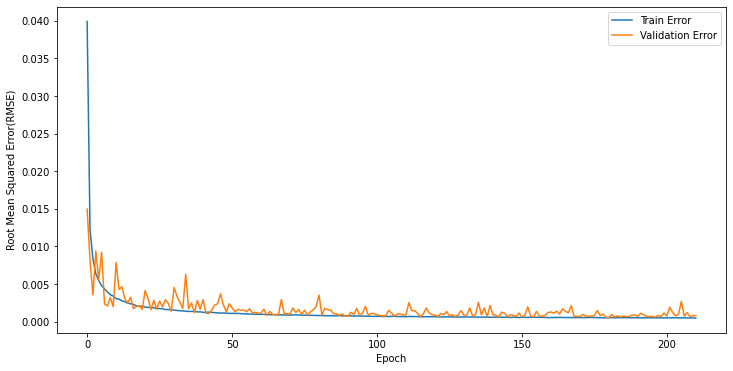

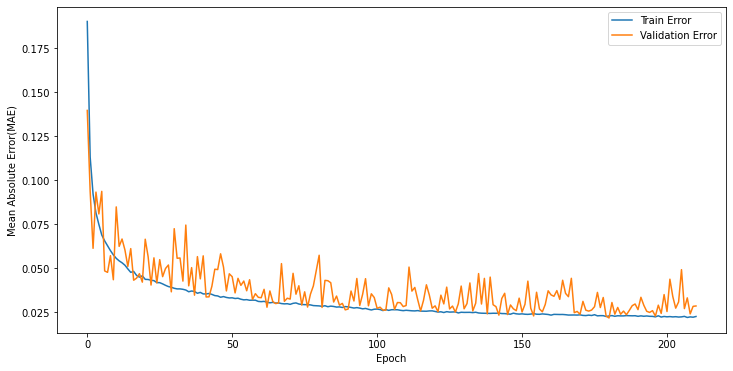

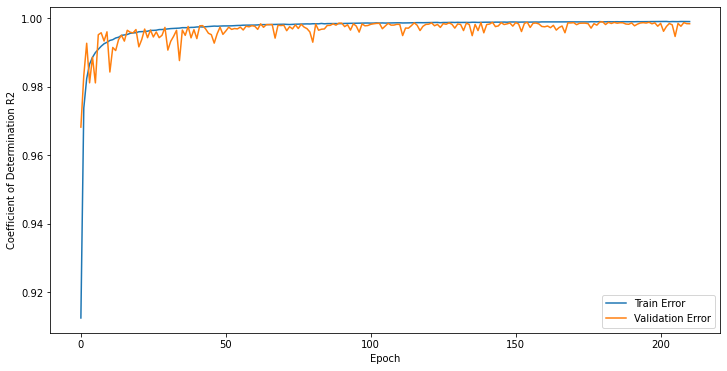

In [ ]:
plotHistory(hist)

In [ ]:
print('Red de Neuronas:')
errorMetrics(X_train,y_train,X_test,y_test, model.predict(X_train).flatten(),model.predict(X_test).flatten())

Red de Neuronas:

RMSE Train standarized values:  0.032463470084234274
RMSE Test standarized values:  0.04408523551045396
RMSE Test absolute values:  0.44468789832474886

MAE Train standarized values:  0.024408859836442035
MAE Test standarized values:  0.029908445005289802
MAE Test absolute values:  0.3016866134760033

R2 Train:  0.9989556072926263
R2 Test:  0.9979828385135477


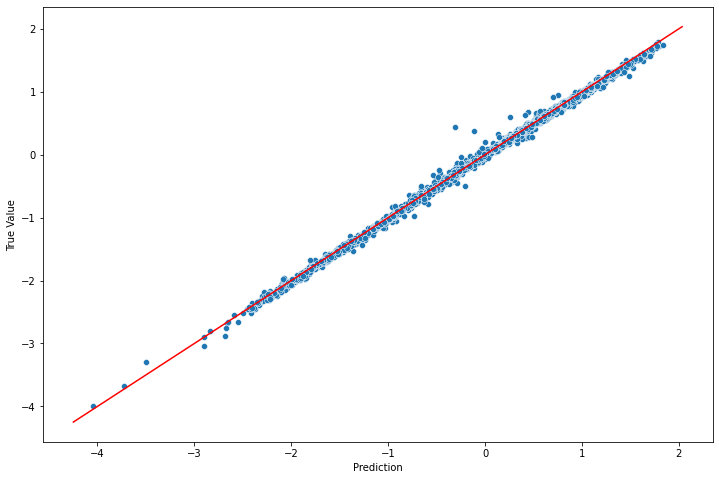

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=y_test, x=model.predict(X_test).flatten())
plt.xlabel('Prediction')
plt.ylabel('True Value')

plt.plot([y_test.min()-0.25, y_test.max()+0.25], [y_test.min()-0.25, y_test.max()+0.25], color='r')